In [1]:
import json
import pandas as pd

from datetime import datetime
from elasticsearch import Elasticsearch
es = Elasticsearch()

In [2]:
# Query parameters
k = 10000
location = "boston"
start_date = '2020-12-21' # default is '2020-12-21'
end_date = '2021-03-21'   # default is '2020-12-21' + 90d
index_name = "airbnb_history_" + location

In [3]:
# Ranker 1. Return all documents and order by id

res = es.search(index=index_name, body={"size": k, "query": {"match_all": {}}})
print("Got %d Hits:" % res['hits']['total']['value'])
for hit in res['hits']['hits']:
    print("%s " % hit["_score"], "%(listing_url)s %(last_scraped)s %(name)s: %(overall_rating)s" % hit["_source"])

Got 10000 Hits:
1.0  https://www.airbnb.com/rooms/3781 20180718 HARBORSIDE-Walk to subway: 5.0
1.0  https://www.airbnb.com/rooms/5506 20180718 **$99 Special **   Private! Minutes to center!: 4.916666666666667
1.0  https://www.airbnb.com/rooms/6695 20180718 $125 Special!! Home Away! Condo: 4.833333333333333
1.0  https://www.airbnb.com/rooms/6976 20180718 Mexican Folk Art Haven in Boston Residential Area: 4.833333333333333
1.0  https://www.airbnb.com/rooms/8789 20180718 Curved Glass Studio/1bd facing Park: 4.75
1.0  https://www.airbnb.com/rooms/8792 20180718 Large 1 Bed facing State House: 4.916666666666667
1.0  https://www.airbnb.com/rooms/8865 20180718 Walk to Medical Area - room: 4.083333333333333
1.0  https://www.airbnb.com/rooms/9273 20180718 Stay at "HARBORVIEW" Walk to subway: 4.833333333333333
1.0  https://www.airbnb.com/rooms/10758 20180718 Budget Single - share bath: 3.5
1.0  https://www.airbnb.com/rooms/10807 20180718 Budget Double - share bath : 3.3333333333333335
1.0  https:

1.0  https://www.airbnb.com/rooms/5822827 20180718 Charming South End Apartment: 4.916666666666667
1.0  https://www.airbnb.com/rooms/5825829 20180718 Brownstone Luxury Penthouse Condo: 5.0
1.0  https://www.airbnb.com/rooms/5826159 20180718 Quintessential South End: 5.0
1.0  https://www.airbnb.com/rooms/5832127 20180718 Spacious bedroom in full apartment: 4.083333333333333
1.0  https://www.airbnb.com/rooms/5844314 20180718 Walk To Beach or City 1 -Our #1 Requested Room: 4.5
1.0  https://www.airbnb.com/rooms/5856633 20180718 Condo overlooking Boston Harbour: 4.833333333333333
1.0  https://www.airbnb.com/rooms/5858133 20180718 Lower Allston is the new Harvard Sq: 4.666666666666667
1.0  https://www.airbnb.com/rooms/5862806 20180718 Huge sunny room 19min red subway to downtown: 4.833333333333333
1.0  https://www.airbnb.com/rooms/5862871 20180718 Relaxing room with dark curtains 20min to downtown: 4.666666666666667
1.0  https://www.airbnb.com/rooms/5867761 20180718 Lovely Apartment in South 

1.0  https://www.airbnb.com/rooms/7342489 20180718 Beautiful 2Bedroom in the South End, Garden Unit: 4.916666666666667
1.0  https://www.airbnb.com/rooms/7346760 20180718 Private bedroom in great location in Allston!: 5.0
1.0  https://www.airbnb.com/rooms/7367795 20180718 3 men & a dog 1 room for rent: 4.916666666666667
1.0  https://www.airbnb.com/rooms/7368611 20180718 South End townhouse apt with deck: 4.916666666666667
1.0  https://www.airbnb.com/rooms/7395978 20180718 Private Bedroom/Bathroom! Allston: 4.916666666666667
1.0  https://www.airbnb.com/rooms/7403927 20180718 Two rooms and a small entryway: 4.75
1.0  https://www.airbnb.com/rooms/7441144 20180718 Charming single family home: 4.333333333333333
1.0  https://www.airbnb.com/rooms/7450348 20180718 Simple North End Apartment: 0.0
1.0  https://www.airbnb.com/rooms/7454267 20180718 MARATHON WEEKEND: Lovely Modern Condo in JP: 4.916666666666667
1.0  https://www.airbnb.com/rooms/7454907 20180718 North End Apartment: 4.83333333333333

1.0  https://www.airbnb.com/rooms/8774554 20180718 Historic Charlestown|Quaint Roomy|2BR 1BA: 4.75
1.0  https://www.airbnb.com/rooms/8774600 20180718 Private Bedroom & Bath @Kendall/MIT: 4.916666666666667
1.0  https://www.airbnb.com/rooms/8775096 20180718 1 bedroom with desk and internet access, if you have you own laptop: 0.0
1.0  https://www.airbnb.com/rooms/8780440 20180718 BC,BU sleeps 4,close to T,Boston: 4.666666666666667
1.0  https://www.airbnb.com/rooms/8789821 20180718 Renovated -- Single Room: 4.833333333333333
1.0  https://www.airbnb.com/rooms/8799256 20180718 A View of Boston Common: 4.916666666666667
1.0  https://www.airbnb.com/rooms/8801250 20180718 Cute & Comfy in JP!: 4.833333333333333
1.0  https://www.airbnb.com/rooms/8813451 20180718 Beautiful 3BR Boston Location!: 4.75
1.0  https://www.airbnb.com/rooms/8814039 20180718 In The Heart of Boston!!: 4.5
1.0  https://www.airbnb.com/rooms/8814105 20180718 Incredible Downtown Boston!: 4.916666666666667
1.0  https://www.airbn

1.0  https://www.airbnb.com/rooms/12432535 20180718 Cozy 1BR w/ private deck in historic Charlestown!: 4.666666666666667
1.0  https://www.airbnb.com/rooms/12446656 20180718 Comfy sofa bed right in the Fenway: 4.916666666666667
1.0  https://www.airbnb.com/rooms/12489916 20180718 Penthouse in Back Bay: 4.916666666666667
1.0  https://www.airbnb.com/rooms/12492474 20180718 Stay with Fun Family (queen size bed): 5.0
1.0  https://www.airbnb.com/rooms/12493396 20180718 One-BR Apt in Heart of Beacon Hill: 4.833333333333333
1.0  https://www.airbnb.com/rooms/12496332 20180718 Sunny & Spacious room- South End: 0.0
1.0  https://www.airbnb.com/rooms/12515067 20180718 Cozy South Boston Condo by Convention Center!: 4.833333333333333
1.0  https://www.airbnb.com/rooms/12522565 20180718 Lovely private room in Allston: 5.0
1.0  https://www.airbnb.com/rooms/12535687 20180718 In-Law Apartment: 4.916666666666667
1.0  https://www.airbnb.com/rooms/12540640 20180718 Pull out sofa next to T stop and 10 mins to 

1.0  https://www.airbnb.com/rooms/14884243 20180718 Quite Clean Apt.Beautiful Room - 5 Min to Downtown: 4.583333333333333
1.0  https://www.airbnb.com/rooms/14885592 20180718 Bold 1BR in Back Bay by Sonder: 4.583333333333333
1.0  https://www.airbnb.com/rooms/14897219 20180718 Luxury loft in downtown Boston: 4.833333333333333
1.0  https://www.airbnb.com/rooms/14897997 20180718 Spacious 2BR in Downtown Boston by Sonder: 5.0
1.0  https://www.airbnb.com/rooms/14900386 20180718 Twin beds near Harvard Square: 4.75
1.0  https://www.airbnb.com/rooms/14901407 20180718 Cozy Private Room in Back Bay: 0.0
1.0  https://www.airbnb.com/rooms/14907062 20180718 1 Bedroom Unit - South End / Fenway / Back Bay: 5.0
1.0  https://www.airbnb.com/rooms/14909417 20180718 Sunny, family-friendly condo next to Orange Line T: 4.75
1.0  https://www.airbnb.com/rooms/14916248 20180718 Pristine Apt @ Prime location. Steps to Trains!: 4.583333333333333
1.0  https://www.airbnb.com/rooms/14916417 20180718 Sharp Beacon Hil

1.0  https://www.airbnb.com/rooms/16999403 20180718 BROADWAY VIEW APT NEAR THE COMMON & TUFTS MEDICAL: 4.75
1.0  https://www.airbnb.com/rooms/17006819 20180718 Cozy spacious bedroom and bath, women, No smokers: 5.0
1.0  https://www.airbnb.com/rooms/17024774 20180718 Beautiful Beacon Hill Apartment with Roof Deck: 5.0
1.0  https://www.airbnb.com/rooms/17028382 20180718 South End Gem: 5.0
1.0  https://www.airbnb.com/rooms/17036313 20180718 Sunny South Boston Condo with Private Deck & Grill: 4.916666666666667
1.0  https://www.airbnb.com/rooms/17037270 20180718 Double Unit - Downtown/Convention/Ocean/Tour 287BC: 5.0
1.0  https://www.airbnb.com/rooms/17042433 20180718 Massachusetts Ave, Lux 1 Bd Back Bay area-: 4.833333333333333
1.0  https://www.airbnb.com/rooms/17045948 20180718 Amazing apartment in the heart of South Boston: 5.0
1.0  https://www.airbnb.com/rooms/17063804 20180718 Jacques & Smriti's large bright room by JFK-UMASS: 5.0
1.0  https://www.airbnb.com/rooms/17075037 20180718 3BD

1.0  https://www.airbnb.com/rooms/19019562 20180718 ★Spacious 2Br w/deck ★Prime Aug. Dates Open: 4.916666666666667
1.0  https://www.airbnb.com/rooms/19019919 20180718 #2 Cozy private room near airport, downtown Boston: 0.0
1.0  https://www.airbnb.com/rooms/19019981 20180718 #3 Cozy private room near airport, downtown Boston: 4.916666666666667
1.0  https://www.airbnb.com/rooms/19020833 20180718 TheLedder1- Fullbed/2Bth stepstoT 4mtoCT/DT freepk: 4.916666666666667
1.0  https://www.airbnb.com/rooms/19033484 20180718 Elegant One Bedroom in Back Bay: 5.0
1.0  https://www.airbnb.com/rooms/19050865 20180718 Brownstone|Contemporary Newbury Place|1BR 1BA #6: 4.833333333333333
1.0  https://www.airbnb.com/rooms/19051657 20180718 Charming Quaint|Heart of Back Bay|1BR 1BA #5: 4.75
1.0  https://www.airbnb.com/rooms/19052102 20180718 Brownstone|Shopping & Food on Newbury|1BR 1BA #4: 4.75
1.0  https://www.airbnb.com/rooms/19053886 20180718 Newly Renovated Entire Apartment Near Back Bay: 4.333333333333

1.0  https://www.airbnb.com/rooms/20248640 20180718 Family Friendly Brownstone South End 1 BR Duplex: 5.0
1.0  https://www.airbnb.com/rooms/20250936 20180718 Nice 1 bedroom apartment with easy T access: 4.916666666666667
1.0  https://www.airbnb.com/rooms/20256823 20180718 Spacious & Open Luxury Two Bedroom - Beautiful!: 4.5
1.0  https://www.airbnb.com/rooms/20266932 20180718 Charlestown condo with open floor plan: 0.0
1.0  https://www.airbnb.com/rooms/20268369 20180718 Large Private Bedroom Close to Airport: 5.0
1.0  https://www.airbnb.com/rooms/20269422 20180718 #205 Boston double closet AC& 2 Twin Beds 面包 免费讲国语: 4.833333333333333
1.0  https://www.airbnb.com/rooms/20269943 20180718 ★ PRIVATE Condo in Prime Location ★: 5.0
1.0  https://www.airbnb.com/rooms/20279560 20180718 Complete North End Apartment with Patio: 5.0
1.0  https://www.airbnb.com/rooms/20281210 20180718 Private Boston Apartment - Amazing View!: 5.0
1.0  https://www.airbnb.com/rooms/20282569 20180718 Comfortable Room Clo

1.0  https://www.airbnb.com/rooms/20647654 20180718 Cozy 2Deluxe Apt in heart of Boston near The Park: 4.333333333333333
1.0  https://www.airbnb.com/rooms/20648678 20180718 Bright 2BR in Seaport by Sonder: 4.75
1.0  https://www.airbnb.com/rooms/20648721 20180718 Bluebird Special 2-BR Boston Apt + Great Amenities: 0.0
1.0  https://www.airbnb.com/rooms/20648928 20180718 Intimate 2BR in South End by Sonder: 5.0
1.0  https://www.airbnb.com/rooms/20649310 20180718 Comfort and convenience in Boston with parking: 5.0
1.0  https://www.airbnb.com/rooms/20649367 20180718 Chic 1BR in Back Bay by Sonder: 3.5833333333333335
1.0  https://www.airbnb.com/rooms/20650166 20180718 Huge Multilevel Boston Brownstone 1 Bed Apartment: 4.666666666666667
1.0  https://www.airbnb.com/rooms/20650450 20180718 Stunning 2BR/1BA in North End by Domio: 4.833333333333333
1.0  https://www.airbnb.com/rooms/20650467 20180718 Amazing 2BR/1BA near TD Garden by Domio: 4.833333333333333
1.0  https://www.airbnb.com/rooms/20650

1.0  https://www.airbnb.com/rooms/21726280 20180718 Stellar 1 Bedroom in The Heart of Boston!!: 0.0
1.0  https://www.airbnb.com/rooms/21726558 20180718 Spacious 2-BR Bluebird special in Boston, MA!!: 0.0
1.0  https://www.airbnb.com/rooms/21727032 20180718 Upscale 2 Bedroom in Boston near Tufts University!: 0.0
1.0  https://www.airbnb.com/rooms/21727250 20180718 Stunning 2 Bedroom in Boston + Great Views!!: 0.0
1.0  https://www.airbnb.com/rooms/21728531 20180718 Penthouse in the sky with Starbucks: 5.0
1.0  https://www.airbnb.com/rooms/21733394 20180718 Ideal accommodation for Airport and Downtown-6ppl: 5.0
1.0  https://www.airbnb.com/rooms/21735562 20180718 BOSTON BLUE-3 MIN TO GREEN LINE T-RESTAURANTS&BARS: 4.916666666666667
1.0  https://www.airbnb.com/rooms/21736914 20180718 Alex's House: 0.0
1.0  https://www.airbnb.com/rooms/21738629 20180718 1BR Apartment in the West End: 5.0
1.0  https://www.airbnb.com/rooms/21738829 20180718 Downtown Access without Downtown Price-tag!: 5.0
1.0  h

1.0  https://www.airbnb.com/rooms/22150316 20180718 Playful 2BR in South End by Sonder: 4.5
1.0  https://www.airbnb.com/rooms/22151224 20180718 Colorful 2BR in Back Bay by Sonder: 4.833333333333333
1.0  https://www.airbnb.com/rooms/22159020 20180718 Lovely 1BR in Back Bay by Sonder: 4.75
1.0  https://www.airbnb.com/rooms/22161060 20180718 Newly Built Boston 2 BR Near Major Attractions!: 0.0
1.0  https://www.airbnb.com/rooms/22161568 20180718 Gorgeous New 2-BR + Rooftop Deck Near Fenway Park: 0.0
1.0  https://www.airbnb.com/rooms/22161794 20180718 *Modern 2 Bedroom in Boston with Great Views!!: 0.0
1.0  https://www.airbnb.com/rooms/22162414 20180718 Upscale 2 Bedroom in Boston near *Hospitals*: 0.0
1.0  https://www.airbnb.com/rooms/22163249 20180718 Serene 2BR in Mission Hill by Sonder: 4.666666666666667
1.0  https://www.airbnb.com/rooms/22163474 20180718 Exquisite 1 Bedroom by Fenway Park!: 5.0
1.0  https://www.airbnb.com/rooms/22164030 20180718 Wonderful 1BR Condo in Downtown Boston!:

1.0  https://www.airbnb.com/rooms/22302860 20180718 Boston Prime Location: 0.0
1.0  https://www.airbnb.com/rooms/22306356 20180718 Beautiful Eagle Hill Boston: 0.0
1.0  https://www.airbnb.com/rooms/22306805 20180718 NEW 3 BR Luxury Private Home, Boston/Seaport/BCEC: 5.0
1.0  https://www.airbnb.com/rooms/22308544 20180718 Jamaica Plain, Boston Living Rm3: 4.833333333333333
1.0  https://www.airbnb.com/rooms/22308789 20180718 1BR condo in heart of Boston (North End): 4.25
1.0  https://www.airbnb.com/rooms/22320830 20180718 Lively 2BR in Downtown Crossing by Sonder: 4.666666666666667
1.0  https://www.airbnb.com/rooms/22322123 20180718 Unique 2BR in South End by Sonder: 3.9166666666666665
1.0  https://www.airbnb.com/rooms/22322143 20180718 Posh Private Room in Boston: 4.916666666666667
1.0  https://www.airbnb.com/rooms/22323718 20180718 Sophisticated 2BR in Downtown Crossing by Sonder: 4.833333333333333
1.0  https://www.airbnb.com/rooms/22327139 20180718 BRONZE ROOM ★ Modern & Bright- 15 Mi

1.0  https://www.airbnb.com/rooms/23544545 20180718 Sunny Vacation Flat close to Downtown/Subway: 4.75
1.0  https://www.airbnb.com/rooms/23544584 20180718 Ideal for budget travel: 0.0
1.0  https://www.airbnb.com/rooms/23558992 20180718 Fantastic 1BR/1BA in Historic North End: 4.5
1.0  https://www.airbnb.com/rooms/23559548 20180718 Prime 2BR/1BA Apt in Heart of North End: 4.666666666666667
1.0  https://www.airbnb.com/rooms/23561310 20180718 Wonderful 3BR in North End/Little Italy: 4.583333333333333
1.0  https://www.airbnb.com/rooms/23561827 20180718 Classic 3BR/1BA in Little Italy: 4.833333333333333
1.0  https://www.airbnb.com/rooms/23562006 20180718 Charming 2BR in the Heart of Little Italy: 4.416666666666667
1.0  https://www.airbnb.com/rooms/23562641 20180718 Huge 1 Bedroom in Heart of Back Bay: 4.75
1.0  https://www.airbnb.com/rooms/23562852 20180718 Cozy 3BR/1BA Apt by Fenway Park & Northeastern U.: 4.083333333333333
1.0  https://www.airbnb.com/rooms/23563583 20180718 Comfy 1 BR in 

1.0  https://www.airbnb.com/rooms/9352045 20180817 Modern and cozy, private bed & bath: 0.0
1.0  https://www.airbnb.com/rooms/9362821 20180817 Welcome Home: 4.666666666666667
1.0  https://www.airbnb.com/rooms/9367059 20180817 Perfect Location! Cheap price - NO FURNITURE: 4.833333333333333
1.0  https://www.airbnb.com/rooms/9380145 20180817 Cozy oasis in Roslindale: 5.0
1.0  https://www.airbnb.com/rooms/9382898 20180817 Private Bed and Bathroom,parking, close to airport: 4.75
1.0  https://www.airbnb.com/rooms/9383459 20180817 Urban 1850s farmhouse: 4.75
1.0  https://www.airbnb.com/rooms/9386847 20180817 Beacon Hill Classic Downtown Boston: 0.0
1.0  https://www.airbnb.com/rooms/9393163 20180817 Charming Bedroom in Kenmore: 0.0
1.0  https://www.airbnb.com/rooms/9404451 20180817 Newly Renovated Sunny Penthouse!: 0.0
1.0  https://www.airbnb.com/rooms/9407895 20180817 Shared Apartment on Smith Street: 3.8333333333333335
1.0  https://www.airbnb.com/rooms/9410831 20180817 10 Minutes southwest o

1.0  https://www.airbnb.com/rooms/12493396 20180817 One-BR Apt in Heart of Beacon Hill: 4.833333333333333
1.0  https://www.airbnb.com/rooms/12496332 20180817 Sunny & Spacious room- South End: 0.0
1.0  https://www.airbnb.com/rooms/12515067 20180817 Cozy South Boston Condo by Convention Center!: 4.833333333333333
1.0  https://www.airbnb.com/rooms/12522565 20180817 Lovely private room in Allston: 5.0
1.0  https://www.airbnb.com/rooms/12535687 20180817 In-Law Apartment: 4.916666666666667
1.0  https://www.airbnb.com/rooms/12540640 20180817 Pull out sofa next to T stop and 10 mins to BU: 4.833333333333333
1.0  https://www.airbnb.com/rooms/12560987 20180817 3 Bedroom Condo by Subway & Harbor (60W3): 4.666666666666667
1.0  https://www.airbnb.com/rooms/12566065 20180817 Large and Cozy Boston Bedroom: 4.5
1.0  https://www.airbnb.com/rooms/12581300 20180817 Private room in South Boston: 4.916666666666667
1.0  https://www.airbnb.com/rooms/12586305 20180817 Lorna's garden: 4.583333333333333
1.0  ht

1.0  https://www.airbnb.com/rooms/14868157 20180817 Charming room, in hip JP near The T  #1: 5.0
1.0  https://www.airbnb.com/rooms/14870402 20180817 Beautiful Brownstone in Back Bay/1 BDR: 4.916666666666667
1.0  https://www.airbnb.com/rooms/14873100 20180817 Large room, 2nd floor, wood floor: 4.916666666666667
1.0  https://www.airbnb.com/rooms/14873137 20180817 Perfect! Fenway Park Drive Apartment, Superb View!: 4.916666666666667
1.0  https://www.airbnb.com/rooms/14885592 20180817 Bold 1BR in Back Bay by Sonder: 4.583333333333333
1.0  https://www.airbnb.com/rooms/14897219 20180817 Luxury loft in downtown Boston: 4.833333333333333
1.0  https://www.airbnb.com/rooms/14900386 20180817 Large Room near Boston Landing/Harvard Sq: 4.75
1.0  https://www.airbnb.com/rooms/14901407 20180817 Cozy Private Room in Back Bay: 0.0
1.0  https://www.airbnb.com/rooms/14907062 20180817 1 Bedroom Unit - South End / Fenway / Back Bay: 5.0
1.0  https://www.airbnb.com/rooms/14909417 20180817 Sunny, family-frien

1.0  https://www.airbnb.com/rooms/15726469 20180817 Bluebird Gorgeous 1BR Near Boston Children's Hosp: 0.0
1.0  https://www.airbnb.com/rooms/15726711 20180817 Bluebird Cozy 2-BR Near Boston Children's Hospital: 0.0
1.0  https://www.airbnb.com/rooms/15726715 20180817 Sunny private room next to B-line!: 4.583333333333333
1.0  https://www.airbnb.com/rooms/15738758 20180817 62* spacious private room near BU/Harvard/BC: 4.833333333333333
1.0  https://www.airbnb.com/rooms/15757141 20180817 Well-Appointed Bedroom in Savin Hill Townhouse: 5.0
1.0  https://www.airbnb.com/rooms/15767124 20180817 Top Rated Executive Penthouse★ Deck★ Aug. Open: 4.916666666666667
1.0  https://www.airbnb.com/rooms/15767548 20180817 Beacon Hill! 2BR 2Bth Fully Renovated & Very Clean: 5.0
1.0  https://www.airbnb.com/rooms/15769929 20180817 Amazing 5 bed w/PARKING near Downtown BU BC MIT: 4.916666666666667
1.0  https://www.airbnb.com/rooms/15772120 20180817 Room in spacious apartment, Beacon Hill: 0.0
1.0  https://www.

1.0  https://www.airbnb.com/rooms/17907821 20180817 Your Next Stay Should be Here...Beacon Hill Condo: 4.916666666666667
1.0  https://www.airbnb.com/rooms/17908743 20180817 Queen Bed/Near Subway/Free Passes: 4.916666666666667
1.0  https://www.airbnb.com/rooms/17920249 20180817 Central 1BR in Fenway by Sonder: 4.416666666666667
1.0  https://www.airbnb.com/rooms/17920651 20180817 (4a) Comfortable & Quiet Pivate Room by CfSI: 4.25
1.0  https://www.airbnb.com/rooms/17921621 20180817 Mid-Century 1BR in Fenway by Sonder: 4.75
1.0  https://www.airbnb.com/rooms/17922370 20180817 Bright 1BR in Fenway by Sonder: 4.833333333333333
1.0  https://www.airbnb.com/rooms/17922433 20180817 Airy 1BR in Fenway by Sonder: 4.833333333333333
1.0  https://www.airbnb.com/rooms/17923033 20180817 Unique 1BR in Fenway by Sonder: 4.75
1.0  https://www.airbnb.com/rooms/17924239 20180817 Spacious 1-bedroom condo on the train with parking: 0.0
1.0  https://www.airbnb.com/rooms/17927755 20180817 Master Bedroom/Private 

1.0  https://www.airbnb.com/rooms/19111774 20180817 Bedroom for summer( Now till beginning of August): 3.5
1.0  https://www.airbnb.com/rooms/19113658 20180817 4B Boston Dwtn Whole 2BR Suite perfect 4 tour/biz: 4.666666666666667
1.0  https://www.airbnb.com/rooms/19115109 20180817 4A Boston Downtown Whole 2BR/4Bds Apt walk2all: 4.666666666666667
1.0  https://www.airbnb.com/rooms/19115310 20180817 Spacious 2 bedroom, 2 bathroom apartment in Boston: 4.916666666666667
1.0  https://www.airbnb.com/rooms/19115873 20180817 Stayloom’s Upscale Oasis | Private deck, near T: 4.916666666666667
1.0  https://www.airbnb.com/rooms/19117781 20180817 1880's Boston Townhouse on Redline!: 5.0
1.0  https://www.airbnb.com/rooms/19119469 20180817 Bright Spacious  Cozy and Convenient: 4.916666666666667
1.0  https://www.airbnb.com/rooms/19121881 20180817 Huge entire 3 bedrooms unit near airport& downtown: 4.666666666666667
1.0  https://www.airbnb.com/rooms/19122257 20180817 One Bedroom One Bath: 5.0
1.0  https:/

1.0  https://www.airbnb.com/rooms/20433388 20180817 Nice and cozy room in Bringhton!: 4.833333333333333
1.0  https://www.airbnb.com/rooms/20436050 20180817 H2, 2 min walk to T/Metro, 17 min to Downtown: 4.583333333333333
1.0  https://www.airbnb.com/rooms/20436407 20180817 H4, 2 min walk to T/Metro, 17 min to Downtown: 4.583333333333333
1.0  https://www.airbnb.com/rooms/20436494 20180817 H3, 2 min walk to T/Metro, 17 min to Downtown: 4.583333333333333
1.0  https://www.airbnb.com/rooms/20438938 20180817 H7, 2 min walk to T/Metro, 17 min to Downtown: 4.666666666666667
1.0  https://www.airbnb.com/rooms/20441774 20180817 Residential Area: 4.583333333333333
1.0  https://www.airbnb.com/rooms/20443029 20180817 Gorgeous 3 bedroom in Boston's charming South End: 4.916666666666667
1.0  https://www.airbnb.com/rooms/20445979 20180817 Near Silver Line easy 2 Cambridge/Downtown/LMA/BMC: 4.833333333333333
1.0  https://www.airbnb.com/rooms/20446955 20180817 Your Other Home in a Different Town: 4.333333

1.0  https://www.airbnb.com/rooms/21409374 20180817 Lovely Loft in Downtown Crossing by Sonder: 4.666666666666667
1.0  https://www.airbnb.com/rooms/21409887 20180817 Huge flat with best views of 4th of July fireworks: 5.0
1.0  https://www.airbnb.com/rooms/21410674 20180817 Lovely 3BR in Brighton by Sonder: 4.916666666666667
1.0  https://www.airbnb.com/rooms/21411264 20180817 Newly Built 3BR Apt, Super Convenient: 0.0
1.0  https://www.airbnb.com/rooms/21412569 20180817 Private Room, Couch, Close to Train, Bar, Stores: 4.25
1.0  https://www.airbnb.com/rooms/21413584 20180817 Modern One Bedroom in the Seaport: 0.0
1.0  https://www.airbnb.com/rooms/21414431 20180817 Boston Elegance with free parking: 4.583333333333333
1.0  https://www.airbnb.com/rooms/21414884 20180817 2A BU Medical/NEU sunny cozy room: 4.583333333333333
1.0  https://www.airbnb.com/rooms/21423860 20180817 Newly Built Apartment with Convenient Location: 4.666666666666667
1.0  https://www.airbnb.com/rooms/21426396 20180817 C

1.0  https://www.airbnb.com/rooms/21931780 20180817 23 upper, cozy, beautiful and close to Boston: 4.333333333333333
1.0  https://www.airbnb.com/rooms/21933597 20180817 1 bhk apartment | cheap stay | good deal: 4.916666666666667
1.0  https://www.airbnb.com/rooms/21933807 20180817 Luxury 18th Floor Apartment: 4.833333333333333
1.0  https://www.airbnb.com/rooms/21934940 20180817 The magical TreeTop House: central and cozy: 4.833333333333333
1.0  https://www.airbnb.com/rooms/21935818 20180817 Beautiful Updated 3 BR Condo in Boston (Entire): 4.916666666666667
1.0  https://www.airbnb.com/rooms/21935939 20180817 Wonderful Suite, Haven for Asian food, Good Price: 4.25
1.0  https://www.airbnb.com/rooms/21941640 20180817 Private Room+Bath in Luxury Brownstone Near Logan: 5.0
1.0  https://www.airbnb.com/rooms/21943599 20180817 2 APTS 6 BD 3 BA - FENWAY/HYNES CONVENTION CENTER: 4.916666666666667
1.0  https://www.airbnb.com/rooms/21944075 20180817 Charming APT near Fenway/Convention Center :): 0.0

1.0  https://www.airbnb.com/rooms/22525315 20180817 Southie Cool|1BD 1BR #8: 0.0
1.0  https://www.airbnb.com/rooms/22526170 20180817 Back Bay, top Boston-location !: 4.75
1.0  https://www.airbnb.com/rooms/22526346 20180817 Neighborhood Home with Ideal City Location: 4.916666666666667
1.0  https://www.airbnb.com/rooms/22526946 20180817 Sunny 2BR in Downtown Crossing by Sonder: 4.25
1.0  https://www.airbnb.com/rooms/22528941 20180817 Pleasant 2BR In Downtown Crossing By Sonder: 4.333333333333333
1.0  https://www.airbnb.com/rooms/22529745 20180817 Unique 1BR in Financial District by Sonder: 4.666666666666667
1.0  https://www.airbnb.com/rooms/22530658 20180817 Fun Loc.|Home in Southie|1BR 1BA #4: 0.0
1.0  https://www.airbnb.com/rooms/22531126 20180817 Southie History|Old Harbor|1BR 1BA #5: 0.0
1.0  https://www.airbnb.com/rooms/22532117 20180817 Spacious 1BR in Financial District by Sonder: 4.5
1.0  https://www.airbnb.com/rooms/22532803 20180817 Playful 1BR in Fenway by Sonder: 5.0
1.0  htt

1.0  https://www.airbnb.com/rooms/23567927 20180817 Washington Unit 3 | 3BR 2BA | 3rd Floor: 4.583333333333333
1.0  https://www.airbnb.com/rooms/23577116 20180817 Beautiful Modern Brownstone in Charming Back Bay!: 5.0
1.0  https://www.airbnb.com/rooms/23579975 20180817 Gorgeous Family Home: 4.916666666666667
1.0  https://www.airbnb.com/rooms/23580616 20180817 1 BR apartment Fenway for a month: 0.0
1.0  https://www.airbnb.com/rooms/23591912 20180817 Wake Up to Your Best Day @ Charlie's E Boston: 4.916666666666667
1.0  https://www.airbnb.com/rooms/23592161 20180817 Cozy 1 bed close to great food & the waterfront.: 4.833333333333333
1.0  https://www.airbnb.com/rooms/23592485 20180817 FREE PARKING!!Such a great location right price :): 4.916666666666667
1.0  https://www.airbnb.com/rooms/23592492 20180817 Rest Your Soul @Charlie's E Boston: 4.833333333333333
1.0  https://www.airbnb.com/rooms/23594420 20180817 1 Bedroom with Key-less entry Mission Hill: 4.833333333333333
1.0  https://www.air

1.0  https://www.airbnb.com/rooms/24698814 20180817 Beautiful  private Room /temperpiedic bed.: 4.916666666666667
1.0  https://www.airbnb.com/rooms/24700355 20180817 Amazing location in Fenway, luxury building,2-4ppl: 0.0
1.0  https://www.airbnb.com/rooms/24700956 20180817 1 Private bedroom in Fenway/Back Bay Area: 5.0
1.0  https://www.airbnb.com/rooms/24709494 20180817 Spacious one bedroom apartment in Boston: 5.0
1.0  https://www.airbnb.com/rooms/24713895 20180817 Clean Private Room near Longwood Medical in Boston: 5.0
1.0  https://www.airbnb.com/rooms/24715104 20180817 One of Boston’s most vibrant neighborhoods!: 4.833333333333333
1.0  https://www.airbnb.com/rooms/24716121 20180817 Great room in a nice home close to public trans: 5.0
1.0  https://www.airbnb.com/rooms/24724126 20180817 2 Bedrooms (Queen, Sofabed) in Victorian Farmhouse: 5.0
1.0  https://www.airbnb.com/rooms/24726236 20180817 Private Queen-Sized Bedroom in Boston!: 4.833333333333333
1.0  https://www.airbnb.com/rooms/2

1.0  https://www.airbnb.com/rooms/26816267 20180817 3-bedroom Apartment in Brighton: 4.833333333333333
1.0  https://www.airbnb.com/rooms/26828892 20180817 Shelly's Place 4: 4.75
1.0  https://www.airbnb.com/rooms/26832145 20180817 Convention Center Convenience - 2BR -Beats a Hotel: 4.833333333333333
1.0  https://www.airbnb.com/rooms/26832651 20180817 BU Apartment: 0.0
1.0  https://www.airbnb.com/rooms/26834482 20180817 Fenway Studio, walk to everything!: 5.0
1.0  https://www.airbnb.com/rooms/26835422 20180817 The Best Private Bedroom Above Boston!: 5.0
1.0  https://www.airbnb.com/rooms/26835473 20180817 Magnificent 1BR Apartment at Mass General!: 0.0
1.0  https://www.airbnb.com/rooms/26841132 20180817 Huge, Cozy Boston Room: 4.583333333333333
1.0  https://www.airbnb.com/rooms/26842959 20180817 Boston Baseball Landing: 4.5
1.0  https://www.airbnb.com/rooms/26847026 20180817 Spacious & Elegant Boston Apartment: 0.0
1.0  https://www.airbnb.com/rooms/26849307 20180817 Fairmount Hill apartme

In [4]:
res

{'took': 208,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': 1.0,
  'hits': [{'_index': 'airbnb_history_boston',
    '_type': 'doc',
    '_id': 'dh17yXcBLDmwrO9F2tra',
    '_score': 1.0,
    '_source': {'id': 3781,
     'listing_url': 'https://www.airbnb.com/rooms/3781',
     'scrape_id': 20180718194756,
     'last_scraped': '20180718',
     'crawled_date': '20180718',
     'name': 'HARBORSIDE-Walk to subway',
     'host_id': 4804,
     'host_is_superhost': 'f',
     'host_identity_verified': 'f',
     'room_type': 'Entire home/apt',
     'accommodates': 2,
     'guests_included': 2,
     'minimum_nights': 30,
     'maximum_nights': 1125,
     'calendar_updated': '4 weeks ago',
     'instant_bookable': 'f',
     'is_business_travel_ready': 'f',
     'cancellation_policy': 'super_strict_30',
     'price': 125.0,
     'availability_30': 10,
     'availability_60': 25,
     '

In [5]:
type(res)

dict

In [6]:
pd.DataFrame.from_dict(res, orient='index')

,0
took,208
timed_out,False
_shards,"{'total': 1, 'successful': 1, 'skipped': 0, 'f..."
hits,"{'total': {'value': 10000, 'relation': 'gte'},..."


In [7]:
df = pd.json_normalize(res['hits']['hits'])

In [8]:
df

,_index,_type,_id,_score,_source.id,_source.listing_url,_source.scrape_id,_source.last_scraped,_source.crawled_date,_source.name,...,_source.first_review,_source.last_review,_source.review_scores_rating,_source.review_scores_accuracy,_source.review_scores_cleanliness,_source.review_scores_checkin,_source.review_scores_communication,_source.review_scores_location,_source.review_scores_value,_source.overall_rating
0,airbnb_history_boston,doc,dh17yXcBLDmwrO9F2tra,1.0,3781,https://www.airbnb.com/rooms/3781,20180718194756,20180718,20180718,HARBORSIDE-Walk to subway,...,20150710,20180702,99.0,10.0,10.0,10.0,10.0,10.0,10.0,5.000000
1,airbnb_history_boston,doc,dx17yXcBLDmwrO9F2tra,1.0,5506,https://www.airbnb.com/rooms/5506,20180718194756,20180718,20180718,**$99 Special ** Private! Minutes to center!,...,20090321,20180705,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.916667
2,airbnb_history_boston,doc,eB17yXcBLDmwrO9F2tra,1.0,6695,https://www.airbnb.com/rooms/6695,20180718194756,20180718,20180718,$125 Special!! Home Away! Condo,...,20090806,20180601,96.0,10.0,10.0,10.0,10.0,9.0,9.0,4.833333
3,airbnb_history_boston,doc,eR17yXcBLDmwrO9F2tra,1.0,6976,https://www.airbnb.com/rooms/6976,20180718194756,20180718,20180718,Mexican Folk Art Haven in Boston Residential Area,...,20090719,20180626,98.0,10.0,9.0,10.0,10.0,9.0,10.0,4.833333
4,airbnb_history_boston,doc,eh17yXcBLDmwrO9F2tra,1.0,8789,https://www.airbnb.com/rooms/8789,20180718194756,20180718,20180718,Curved Glass Studio/1bd facing Park,...,20140812,20180624,91.0,9.0,9.0,10.0,10.0,10.0,9.0,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,airbnb_history_boston,doc,Th57yXcBLDmwrO9F7QlO,1.0,27705916,https://www.airbnb.com/rooms/27705916,20180817025537,20180817,20180817,next to Logan airport apartment,...,19910101,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9996,airbnb_history_boston,doc,Tx57yXcBLDmwrO9F7QlO,1.0,27707705,https://www.airbnb.com/rooms/27707705,20180817025537,20180817,20180817,Luxury Loft In Downtown Boston,...,19910101,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9997,airbnb_history_boston,doc,UB57yXcBLDmwrO9F7QlO,1.0,27707727,https://www.airbnb.com/rooms/27707727,20180817025537,20180817,20180817,17 Thacher St,...,19910101,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9998,airbnb_history_boston,doc,UR57yXcBLDmwrO9F7QlO,1.0,27718890,https://www.airbnb.com/rooms/27718890,20180817025537,20180817,20180817,Cozy & Quit Hideout in City Central / Back Bay,...,19910101,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [9]:
len(df)

10000

In [10]:
df['_source.last_scraped'].value_counts().sort_index(ascending=True)

20180718    5000
20180817    5000
Name: _source.last_scraped, dtype: int64

/Users/nattiya/miniconda3/envs/dl/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'date')

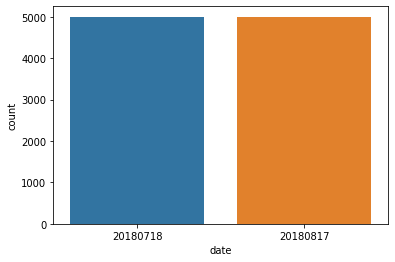

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(df['_source.last_scraped'])
plt.xlabel('date')

# Analyze All Document Distribution over Time

In [12]:
from elasticsearch.helpers import scan

res = scan(
    es,
    index=index_name,
    query={"query": { "match_all" : {}}}
)

In [13]:
data = list(res)

In [14]:
len(data)

162737

In [15]:
data[0]

{'_index': 'airbnb_history_boston',
 '_type': 'doc',
 '_id': 'dh17yXcBLDmwrO9F2tra',
 '_score': None,
 '_source': {'id': 3781,
  'listing_url': 'https://www.airbnb.com/rooms/3781',
  'scrape_id': 20180718194756,
  'last_scraped': '20180718',
  'crawled_date': '20180718',
  'name': 'HARBORSIDE-Walk to subway',
  'host_id': 4804,
  'host_is_superhost': 'f',
  'host_identity_verified': 'f',
  'room_type': 'Entire home/apt',
  'accommodates': 2,
  'guests_included': 2,
  'minimum_nights': 30,
  'maximum_nights': 1125,
  'calendar_updated': '4 weeks ago',
  'instant_bookable': 'f',
  'is_business_travel_ready': 'f',
  'cancellation_policy': 'super_strict_30',
  'price': 125.0,
  'availability_30': 10,
  'availability_60': 25,
  'availability_90': 55,
  'availability_365': 145,
  'number_of_reviews': 14,
  'first_review': '20150710',
  'last_review': '20180702',
  'review_scores_rating': 99.0,
  'review_scores_accuracy': 10.0,
  'review_scores_cleanliness': 10.0,
  'review_scores_checkin': 1

In [16]:

# appending rows 
docs = []
for item in data:  
    doc = {
        'id': item['_id'],
        'index': item['_index'],
        'listing_url': item['_source']['listing_url'],
        'scrape_id': item['_source']['scrape_id'],
        'last_scraped': item['_source']['last_scraped'],
        'name': item['_source']['name'],
        'host_id': item['_source']['host_id'],
        'price': item['_source']['price'],
        'availability_30': item['_source']['availability_30'],
        'availability_60': item['_source']['availability_60'],
        'availability_90': item['_source']['availability_90'],
        'availability_365': item['_source']['availability_365'],
        'first_review': item['_source']['first_review'],
        'last_review': item['_source']['last_review'],
        'review_scores_rating': item['_source']['review_scores_rating'],
        'review_scores_accuracy': item['_source']['review_scores_accuracy'],
        'review_scores_cleanliness': item['_source']['review_scores_cleanliness'],
        'review_scores_checkin': item['_source']['review_scores_checkin'],
        'review_scores_communication': item['_source']['review_scores_communication'],
        'review_scores_location': item['_source']['review_scores_location'],
        'review_scores_value': item['_source']['review_scores_value'],
        'overall_rating': item['_source']['overall_rating']
    }
    
    docs.append(doc) 

In [17]:
df = pd.DataFrame(docs)

In [18]:
df.head()

,id,index,listing_url,scrape_id,last_scraped,name,host_id,price,availability_30,availability_60,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,overall_rating
0,dh17yXcBLDmwrO9F2tra,airbnb_history_boston,https://www.airbnb.com/rooms/3781,20180718194756,20180718,HARBORSIDE-Walk to subway,4804,125.0,10,25,...,20150710,20180702,99.0,10.0,10.0,10.0,10.0,10.0,10.0,5.000000
1,dx17yXcBLDmwrO9F2tra,airbnb_history_boston,https://www.airbnb.com/rooms/5506,20180718194756,20180718,**$99 Special ** Private! Minutes to center!,8229,145.0,3,18,...,20090321,20180705,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.916667
2,eB17yXcBLDmwrO9F2tra,airbnb_history_boston,https://www.airbnb.com/rooms/6695,20180718194756,20180718,$125 Special!! Home Away! Condo,8229,169.0,2,8,...,20090806,20180601,96.0,10.0,10.0,10.0,10.0,9.0,9.0,4.833333
3,eR17yXcBLDmwrO9F2tra,airbnb_history_boston,https://www.airbnb.com/rooms/6976,20180718194756,20180718,Mexican Folk Art Haven in Boston Residential Area,16701,65.0,10,24,...,20090719,20180626,98.0,10.0,9.0,10.0,10.0,9.0,10.0,4.833333
4,eh17yXcBLDmwrO9F2tra,airbnb_history_boston,https://www.airbnb.com/rooms/8789,20180718194756,20180718,Curved Glass Studio/1bd facing Park,26988,99.0,7,13,...,20140812,20180624,91.0,9.0,9.0,10.0,10.0,10.0,9.0,4.750000


In [19]:
df.shape

(162737, 22)

In [20]:
df['last_scraped'].value_counts().sort_index(ascending=True)

20151003    2558
20160907    3585
20171006    4870
20180414     789
20180415    5604
20180517    5365
20180518     595
20180519       8
20180718    5997
20180817    6036
20180914    5957
20181011    6014
20181117    6294
20181126       2
20181213    6217
20190117    6247
20190209    6155
20190312    6221
20190415    6202
20190519    6240
20190524       1
20190614    6246
20190714    6262
20190715       2
20190819    6214
20190922    5710
20191011       1
20191018    1618
20191019    4029
20191121    5387
20191204    3504
20191205       3
20200105    3744
20200117       2
20200213    3903
20200316    3799
20200414    3845
20200512    1145
20200513    2540
20200514       3
20200610    3440
20200711     497
20200831    1704
20200901    1635
20200928    2639
20200929     654
20201024    3254
Name: last_scraped, dtype: int64

In [21]:
len(df[df['last_scraped'] == '2020-09-29'])

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162737 entries, 0 to 162736
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           162737 non-null  object 
 1   index                        162737 non-null  object 
 2   listing_url                  162737 non-null  object 
 3   scrape_id                    162737 non-null  int64  
 4   last_scraped                 162737 non-null  object 
 5   name                         162737 non-null  object 
 6   host_id                      162737 non-null  int64  
 7   price                        162737 non-null  float64
 8   availability_30              162737 non-null  int64  
 9   availability_60              162737 non-null  int64  
 10  availability_90              162737 non-null  int64  
 11  availability_365             162737 non-null  int64  
 12  first_review                 162737 non-null  object 
 13 

In [23]:
df['crawled_date'] = df['scrape_id'].astype(str)
df['crawled_date'] = df['crawled_date'].apply(lambda x: x[:8])

In [24]:
df['crawled_date'].value_counts().sort_index(ascending=True)

20151002    2558
20160906    3585
20171005    4870
20180414    6393
20180517    5968
20180718    5997
20180817    6036
20180914    5957
20181011    6014
20181117    6296
20181213    6217
20190117    6247
20190209    6155
20190312    6221
20190415    6202
20190519    6241
20190614    6246
20190714    6264
20190819    6214
20190922    5711
20191018    5647
20191121    5387
20191204    3507
20200105    3746
20200213    3903
20200316    3799
20200414    3845
20200512    3688
20200610    3440
20200711     497
20200831    3339
20200928    3293
20201024    3254
Name: crawled_date, dtype: int64

# Simulate Search Impressions over Time

In [25]:
# Query parameters
k = 300
location = "boston"
start_date = '2020-12-21' # default is '2020-12-21'
end_date = '2021-03-21'   # default is '2020-12-21' + 90d
index_name = "airbnb_history_" + location

In [26]:
# Ranker 1. Return top-300 documents and order by document id
res = es.search(index=index_name, body={"size": k, "query": {"match_all": {}}})
print("Got %d Hits:" % res['hits']['total']['value'])
for hit in res['hits']['hits']:
    print("%s " % hit["_score"], "%(id)s %(name)s ratings: %(overall_rating)s, price: %(price)s, availability: %(availability_30)s" % hit["_source"])

Got 10000 Hits:
1.0  3781 HARBORSIDE-Walk to subway ratings: 5.0, price: 125.0, availability: 10
1.0  5506 **$99 Special **   Private! Minutes to center! ratings: 4.916666666666667, price: 145.0, availability: 3
1.0  6695 $125 Special!! Home Away! Condo ratings: 4.833333333333333, price: 169.0, availability: 2
1.0  6976 Mexican Folk Art Haven in Boston Residential Area ratings: 4.833333333333333, price: 65.0, availability: 10
1.0  8789 Curved Glass Studio/1bd facing Park ratings: 4.75, price: 99.0, availability: 7
1.0  8792 Large 1 Bed facing State House ratings: 4.916666666666667, price: 154.0, availability: 2
1.0  8865 Walk to Medical Area - room ratings: 4.083333333333333, price: 100.0, availability: 13
1.0  9273 Stay at "HARBORVIEW" Walk to subway ratings: 4.833333333333333, price: 225.0, availability: 0
1.0  10758 Budget Single - share bath ratings: 3.5, price: 115.0, availability: 0
1.0  10807 Budget Double - share bath  ratings: 3.3333333333333335, price: 80.0, availability: 0
1

In [27]:
df = pd.json_normalize(res['hits']['hits'])


In [28]:
# Ranker 2. Return all documents and order descendingly by overall_rating, id

res = es.search(index=index_name, body={"size": k, "sort" : [{ "overall_rating" : "desc" }, "_score"], "query": {"match_all": {}}})
print("Got %d Hits:" % res['hits']['total']['value'])
for hit in res['hits']['hits']:
    print("%s " % hit["_score"], "%(id)s %(name)s ratings: %(overall_rating)s, price: %(price)s, availability: %(availability_30)s" % hit["_source"])

Got 10000 Hits:
1.0  3781 HARBORSIDE-Walk to subway ratings: 5.0, price: 125.0, availability: 10
1.0  12356 Renovated, State House View ratings: 5.0, price: 145.0, availability: 0
1.0  29765 Luxury suite, Moroccan furnishings ratings: 5.0, price: 221.0, availability: 3
1.0  39116 Private Room/Perfect Location! ratings: 5.0, price: 99.0, availability: 2
1.0  40601 Private room & bath - Jamaica Plain ratings: 5.0, price: 95.0, availability: 13
1.0  44205 Elegance at Salem Street Court ratings: 5.0, price: 184.0, availability: 1
1.0  91588 Sunny Private Bedroom. 7 minute walk to Redline T. ratings: 5.0, price: 68.0, availability: 12
1.0  160572 2 Living Rooms, Sunroom Opens to Deck Ocean View ratings: 5.0, price: 495.0, availability: 0
1.0  196806 Comfy couch, Centrally located ratings: 5.0, price: 79.0, availability: 0
1.0  197727 Wonderful  Boston neighborhood Jamaica Plain ratings: 5.0, price: 85.0, availability: 0
1.0  197972 Perfect Location--Super Studio! ratings: 5.0, price: 90.0, 

In [29]:
# Ranker 3. Return all documents with availability > 0 and order descendingly by overall_rating, id
res = es.search(index=index_name, body={
        "size": k, 
        "sort" : [
            { 
                "overall_rating" : "desc" 
            }, "_score"
        ], 
        "query": {
            "bool": {  
                "filter": [ 
                    { "range": { 
                        "availability_30": { 
                            "gt": 0 
                        }
                    }
                }
            ]}
        }
    })
print("Got %d Hits:" % res['hits']['total']['value'])
for hit in res['hits']['hits']:
    print("%s " % hit["_score"], "%(id)s %(name)s, ratings: %(overall_rating)s, price: %(price)s, availability: %(availability_30)s" % hit["_source"])

Got 10000 Hits:
0.0  3781 HARBORSIDE-Walk to subway, ratings: 5.0, price: 125.0, availability: 10
0.0  29765 Luxury suite, Moroccan furnishings, ratings: 5.0, price: 221.0, availability: 3
0.0  39116 Private Room/Perfect Location!, ratings: 5.0, price: 99.0, availability: 2
0.0  40601 Private room & bath - Jamaica Plain, ratings: 5.0, price: 95.0, availability: 13
0.0  44205 Elegance at Salem Street Court, ratings: 5.0, price: 184.0, availability: 1
0.0  91588 Sunny Private Bedroom. 7 minute walk to Redline T., ratings: 5.0, price: 68.0, availability: 12
0.0  197972 Perfect Location--Super Studio!, ratings: 5.0, price: 90.0, availability: 4
0.0  210097 Treetop Haven in the City, ratings: 5.0, price: 100.0, availability: 2
0.0  395975 Steps to Beach, Bars and Downtown!, ratings: 5.0, price: 88.0, availability: 30
0.0  475988 Great 1 bedroom apartment near parks and T in JP!, ratings: 5.0, price: 79.0, availability: 1
0.0  568234 City's Hippest Location/Two Bedrooms/Parking, ratings: 5.0